In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

import cv2 as cv
from imutils import paths
from natsort import natsorted

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.optimizers import RMSprop

In [2]:
#Original Image path
TRAIN_IMG_PATH = (r"C:\Users\Aathi\Documents\PROJECTS-PROF\A. RFMiD_All_Classes_DataseT\1. Original Images\a. Training Set")
VAL_IMG_PATH = (r"C:\Users\Aathi\Documents\PROJECTS-PROF\A. RFMiD_All_Classes_DataseT\1. Original Images\b. Validation Set")
TEST_IMG_PATH = (r"C:\Users\Aathi\Documents\PROJECTS-PROF\A. RFMiD_All_Classes_DataseT\1. Original Images\c. Testing Set")

#Ground_Truth label Folder path
TRAIN_GROUNDTRUTH_PATH = (r"C:\Users\Aathi\Documents\PROJECTS-PROF\A. RFMiD_All_Classes_Dataset\2. Groundtruths\a. RFMiD_Training_Labels.csv")
VAL_GROUNDTRUTH_PATH = (r"C:\Users\Aathi\Documents\PROJECTS-PROF\A. RFMiD_All_Classes_Dataset\2. Groundtruths\b. RFMiD_Validation_Labels.csv")
TEST_GROUNDTRUTH_PATH = (r"C:\Users\Aathi\Documents\PROJECTS-PROF\A. RFMiD_All_Classes_Dataset\2. Groundtruths\c. RFMiD_Testing_Labels.csv")

In [3]:
TRAIN_DF = groundtruths_train_df = pd.read_csv(TRAIN_GROUNDTRUTH_PATH)
TEST_DF = pd.read_csv(TEST_GROUNDTRUTH_PATH)
VAL_DF = pd.read_csv(VAL_GROUNDTRUTH_PATH)

In [4]:
def load_img(TRAIN_IMG_PATH):
    
    img = list(paths.list_images(TRAIN_IMG_PATH))
    lab = [(i.split(os.path.sep)[-1]) for i in img]
    
    image_path = []
    
    for i in natsorted(lab):
        str1 = TRAIN_IMG_PATH +'\{}'.format(i)
        
        image_path.append(str1)
        
    return image_path

In [5]:
def data_folder(img_path , dataFrame):
    
    file_path = pd.Series(img_path, name='img_path')
    data = pd.concat([dataFrame, file_path], axis = 1)
    
    return data

In [6]:
train_img = load_img(TRAIN_IMG_PATH)
test_img = load_img(TEST_IMG_PATH)
val_img = load_img(VAL_IMG_PATH)

In [7]:
train_df = data_folder(train_img, TRAIN_DF)
test_df = data_folder(test_img, TEST_DF)
val_df = data_folder(val_img, VAL_DF)

In [8]:
def plot_image(df):
    
    plt.figure(figsize=(16, 10))
    for i in range(12):
        r = np.random.randint(1, len(df))
        plt.subplot(3, 4, i+1)
        
        img = cv.imread(df.loc[r, 'img_path'])
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        plt.imshow(img)
        plt.xticks()
        plt.yticks()
        
    return img

In [9]:
def plot_canny_image(df):
    
    plt.figure(figsize=(16, 10))
    for i in range(12):
        r = np.random.randint(1, len(df))
        plt.subplot(3, 4, i+1)
        
        img = cv.imread(df.loc[r, 'img_path'])
        #img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        img = cv.Canny(img, 50, 50)
        plt.imshow(img)
        plt.xticks()
        plt.yticks()
        
    return img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

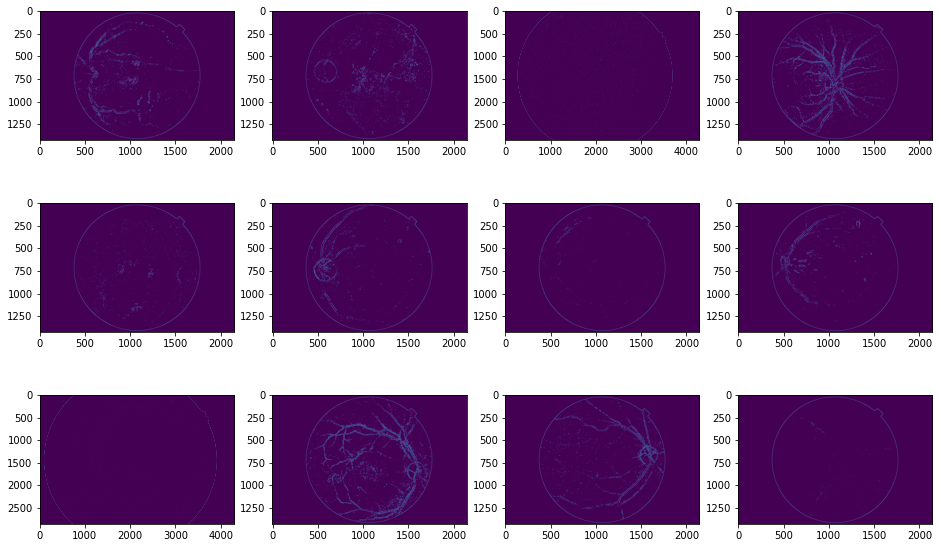

In [10]:
plot_canny_image(train_df)

In [11]:
def show_missing_value(df):
    
    del df['ID']
    columns = list(df.columns)
    columns.remove('img_path')

    d_total = 0
    for col in columns:
        print(col)
        print(df[col].value_counts())
        print('---------------')
        if col != 'Disease_Risk':
            d_total += df[col].sum()

    print(d_total)
    
    return columns

In [12]:
show_missing_value(train_df)

Disease_Risk
1    1519
0     401
Name: Disease_Risk, dtype: int64
---------------
DR
0    1544
1     376
Name: DR, dtype: int64
---------------
ARMD
0    1820
1     100
Name: ARMD, dtype: int64
---------------
MH
0    1603
1     317
Name: MH, dtype: int64
---------------
DN
0    1782
1     138
Name: DN, dtype: int64
---------------
MYA
0    1819
1     101
Name: MYA, dtype: int64
---------------
BRVO
0    1847
1      73
Name: BRVO, dtype: int64
---------------
TSLN
0    1734
1     186
Name: TSLN, dtype: int64
---------------
ERM
0    1906
1      14
Name: ERM, dtype: int64
---------------
LS
0    1873
1      47
Name: LS, dtype: int64
---------------
MS
0    1905
1      15
Name: MS, dtype: int64
---------------
CSR
0    1883
1      37
Name: CSR, dtype: int64
---------------
ODC
0    1638
1     282
Name: ODC, dtype: int64
---------------
CRVO
0    1892
1      28
Name: CRVO, dtype: int64
---------------
TV
0    1914
1       6
Name: TV, dtype: int64
---------------
AH
0    1904
1      16
Nam

['Disease_Risk',
 'DR',
 'ARMD',
 'MH',
 'DN',
 'MYA',
 'BRVO',
 'TSLN',
 'ERM',
 'LS',
 'MS',
 'CSR',
 'ODC',
 'CRVO',
 'TV',
 'AH',
 'ODP',
 'ODE',
 'ST',
 'AION',
 'PT',
 'RT',
 'RS',
 'CRS',
 'EDN',
 'RPEC',
 'MHL',
 'RP',
 'CWS',
 'CB',
 'ODPM',
 'PRH',
 'MNF',
 'HR',
 'CRAO',
 'TD',
 'CME',
 'PTCR',
 'CF',
 'VH',
 'MCA',
 'VS',
 'BRAO',
 'PLQ',
 'HPED',
 'CL']

In [13]:
def weight_calc(col):
    total = len(df)
    weight = (1 / df[col].sum()) *  total / 2
    return weight

In [14]:
def drop_missing_values(df):
    df = df.drop(labels = ['Disease_Risk','ODPM', 'HR'], axis=1)
    return df

In [15]:
train_data = drop_missing_values(train_df)
test_data = drop_missing_values(test_df)
val_data = drop_missing_values(val_df)

In [16]:
def label_columns(df):
    df_labels = (df.drop('img_path', axis=1).columns)
    return df_labels

In [17]:
y_train_labels = label_columns(train_data)
y_test_labels = label_columns(test_data)
y_val_labels = label_columns(val_data)

unique_disease = len(y_train_labels)

In [18]:
def image_augumentation(train_data, test_data, val_data, input_shape = (150, 150)):
    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                horizontal_flip=True,
                                                                vertical_flip=True,
                                                                rotation_range=90,
                                                                brightness_range=[0, 0.1])
    val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
    test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

    train_gen = train_datagen.flow_from_dataframe(train_data, 
                                                  x_col='img_path', 
                                                  y_col=y_train_labels,
                                                  target_size=input_shape,
                                                  class_mode='raw',
                                                  batch_size=16,
                                                  shuffle=True)

    val_gen = val_datagen.flow_from_dataframe(val_data,
                                              x_col='img_path',
                                              y_col=y_val_labels,
                                              target_size=input_shape,
                                              class_mode='raw',
                                              batch_size=8)

    test_gen = test_datagen.flow_from_dataframe(test_data,
                                                x_col='img_path',
                                                y_col=y_test_labels,
                                                target_size=input_shape,
                                                class_mode='raw')
    
    return train_gen, val_gen, test_gen

In [19]:
train_data_gen, val_data_gen, test_data_gen = image_augumentation(train_data, val_data, test_data)

Found 1920 validated image filenames.
Found 640 validated image filenames.
Found 640 validated image filenames.


In [20]:
def model_creation():
    pre_trained_model = InceptionV3(input_shape = (150,150, 3), 
                                include_top = False, 
                                weights = None)
    # pre_trained_model.load_weights(local_weights_file)
    for layer in pre_trained_model.layers:
        layer.trainable = False
    last_layer = pre_trained_model.get_layer('mixed7')
    print('last layer output shape: ', last_layer.output_shape)
    last_output = last_layer.output
    
    x = Flatten()(last_output)
    x = Dropout(0.5)(x) 
    x = Dense(1024, activation='relu')(x)                 
    x = Dense (1, activation='sigmoid')(x)           
    model = Model( pre_trained_model.input, x) 
    model.compile(optimizer = RMSprop(learning_rate=0.0001), 
                  loss = 'binary_crossentropy', 
                  metrics = ['accuracy'])
    
    return model

In [21]:
model = model_creation()

last layer output shape:  (None, 7, 7, 768)


In [22]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

 batch_normalization_10 (BatchN  (None, 16, 16, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 16, 16, 32)  96          ['conv2d_11[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 16, 16, 64)   0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activatio

 conv2d_20 (Conv2D)             (None, 16, 16, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 16, 16, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 16, 16, 48)  144         ['conv2d_20[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 16, 16, 96)  288         ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                                                                                  
 conv2d_34 (Conv2D)             (None, 7, 7, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 7, 7, 128)   384         ['conv2d_34[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 7, 7, 128)    0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_35 (Conv2D)             (None, 7, 7, 128)    114688      ['activation_34[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 activation_44 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 7, 7, 160)   480         ['conv2d_45[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_45[0][0]'] 
                                                                                                  
 conv2d_41

 batch_normalization_55 (BatchN  (None, 7, 7, 160)   480         ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 7, 7, 160)    0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_51 (Conv2D)             (None, 7, 7, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_56 (Conv2D)             (None, 7, 7, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_51 (BatchN  (None, 7, 7, 160)   480         ['conv2d_51[0][0]']              
 ormalizat

 conv2d_61 (Conv2D)             (None, 7, 7, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 7, 7, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 7, 7, 192)   576         ['conv2d_61[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 7, 7, 192)   576         ['conv2d_66[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

In [23]:
#fit and run the model
history = model.fit_generator(
            train_data_gen,
            validation_data = val_data_gen,
            steps_per_epoch=20,
            epochs =10,
            validation_steps=5,
            verbose = 1)

#save the entire model
model.save('saved_model/inceptionnet_v3_model_ML_1')

C:\Users\Aathi\AppData\Local\Temp\ipykernel_37688\2818377623.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
20/20 [==============================] - 139s 6s/step - loss: 0.6621 - accuracy: 0.9690 - val_loss: 7.8951 - val_accuracy: 0.9500
Epoch 2/10
20/20 [==============================] - 112s 6s/step - loss: 0.6165 - accuracy: 0.9750 - val_loss: 14.4158 - val_accuracy: 0.9557
Epoch 3/10
20/20 [==============================] - 119s 6s/step - loss: 0.5719 - accuracy: 0.9740 - val_loss: 20.9508 - val_accuracy: 0.9506
Epoch 4/10
20/20 [==============================] - 112s 6s/step - loss: 0.5342 - accuracy: 0.9741 - val_loss: 27.9612 - val_accuracy: 0.9540
Epoch 5/10
20/20 [==============================] - 115s 6s/step - loss: 0.4960 - accuracy: 0.9757 - val_loss: 40.7844 - val_accuracy: 0.9523
Epoch 6/10
20/20 [==============================] - 123s 6s/step - loss: 0.4416 - accuracy: 0.9738 - val_loss: 39.0219 - val_accuracy: 0.9506
Epoch 7/10
20/20 [==============================] - 112s 6s/step - loss: 0.4143 - accuracy: 0.9749 - val_loss: 57.8060 - val_accuracy: 0.9494
Epoch 8

In [24]:
inc_model = tf.keras.models.load_model('saved_model/inceptionnet_v3_model_1/')

In [25]:
test_loss, test_accuracy = inc_model.evaluate(test_data_gen)

20/20 [==============================] - 171s 8s/step - loss: 49.1448 - accuracy: 0.9527


In [40]:
print("Test loss: {}, Test Accuracy: {}".format(test_loss, test_accuracy))

Test loss: 49.14482498168945, Test Accuracy: 0.9527343511581421
